In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [6]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [7]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
print(f"train size: {train.shape}")
print(f"test size: {test.shape}")

train size: (1460, 81)
test size: (1459, 80)


# 1. Data Pre-procesing
---

### Target Variable

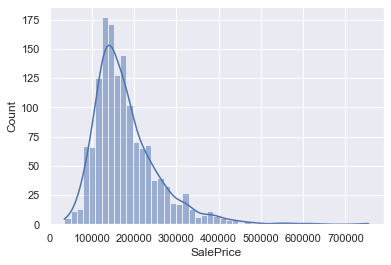

In [36]:
sns.histplot(train, x="SalePrice", kde="True")

In [37]:
print("Kurtosis: {}".format(train["SalePrice"].kurt()))
print("Skewness: {}".format(train["SalePrice"].skew()))

Kurtosis: 6.523066888485879
Skewness: 1.8812964895244009


**correlation matrix**

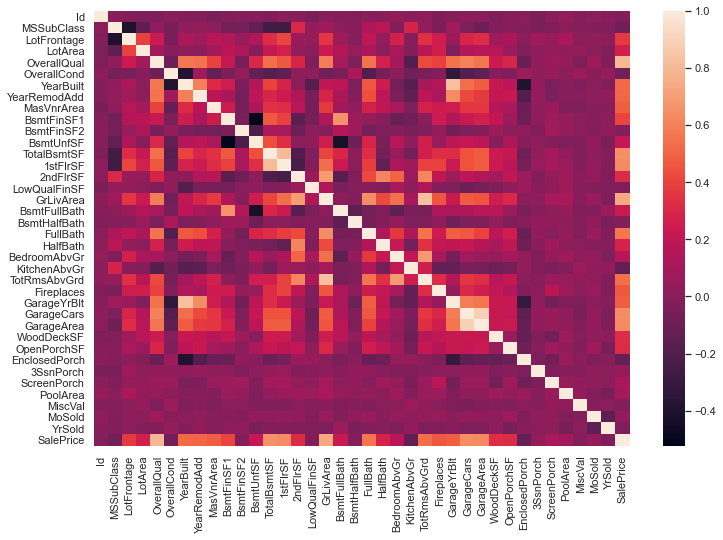

In [38]:
corrmat = train.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corrmat, vmax=1)

best estimators for  SalePrice

In [39]:
best_features = corrmat["SalePrice"].nlargest(10)
best_features

SalePrice       1.000000
OverallQual     0.795774
GrLivArea       0.734968
TotalBsmtSF     0.651153
GarageCars      0.641047
1stFlrSF        0.631530
GarageArea      0.629217
FullBath        0.562165
TotRmsAbvGrd    0.537769
YearBuilt       0.523608
Name: SalePrice, dtype: float64

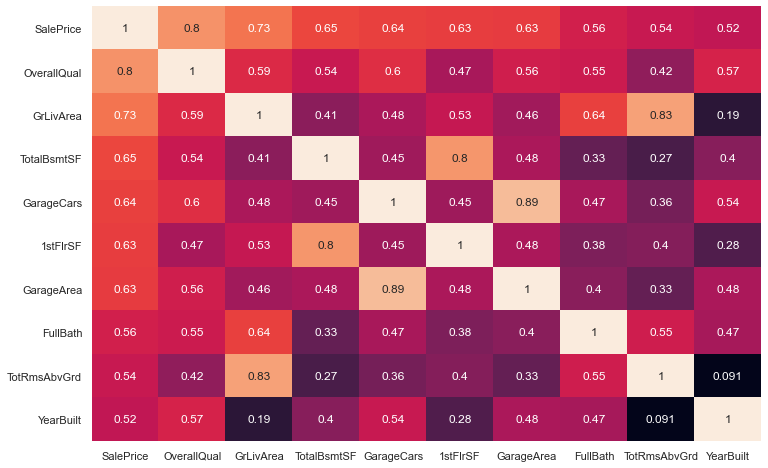

In [40]:
plt.figure(figsize=(12,8))
sns.heatmap(corrmat.loc[best_features.index, best_features.index], cbar=False, annot=True)

In [41]:
best_features.index

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars',
       '1stFlrSF', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

drop some feature correlated with each other

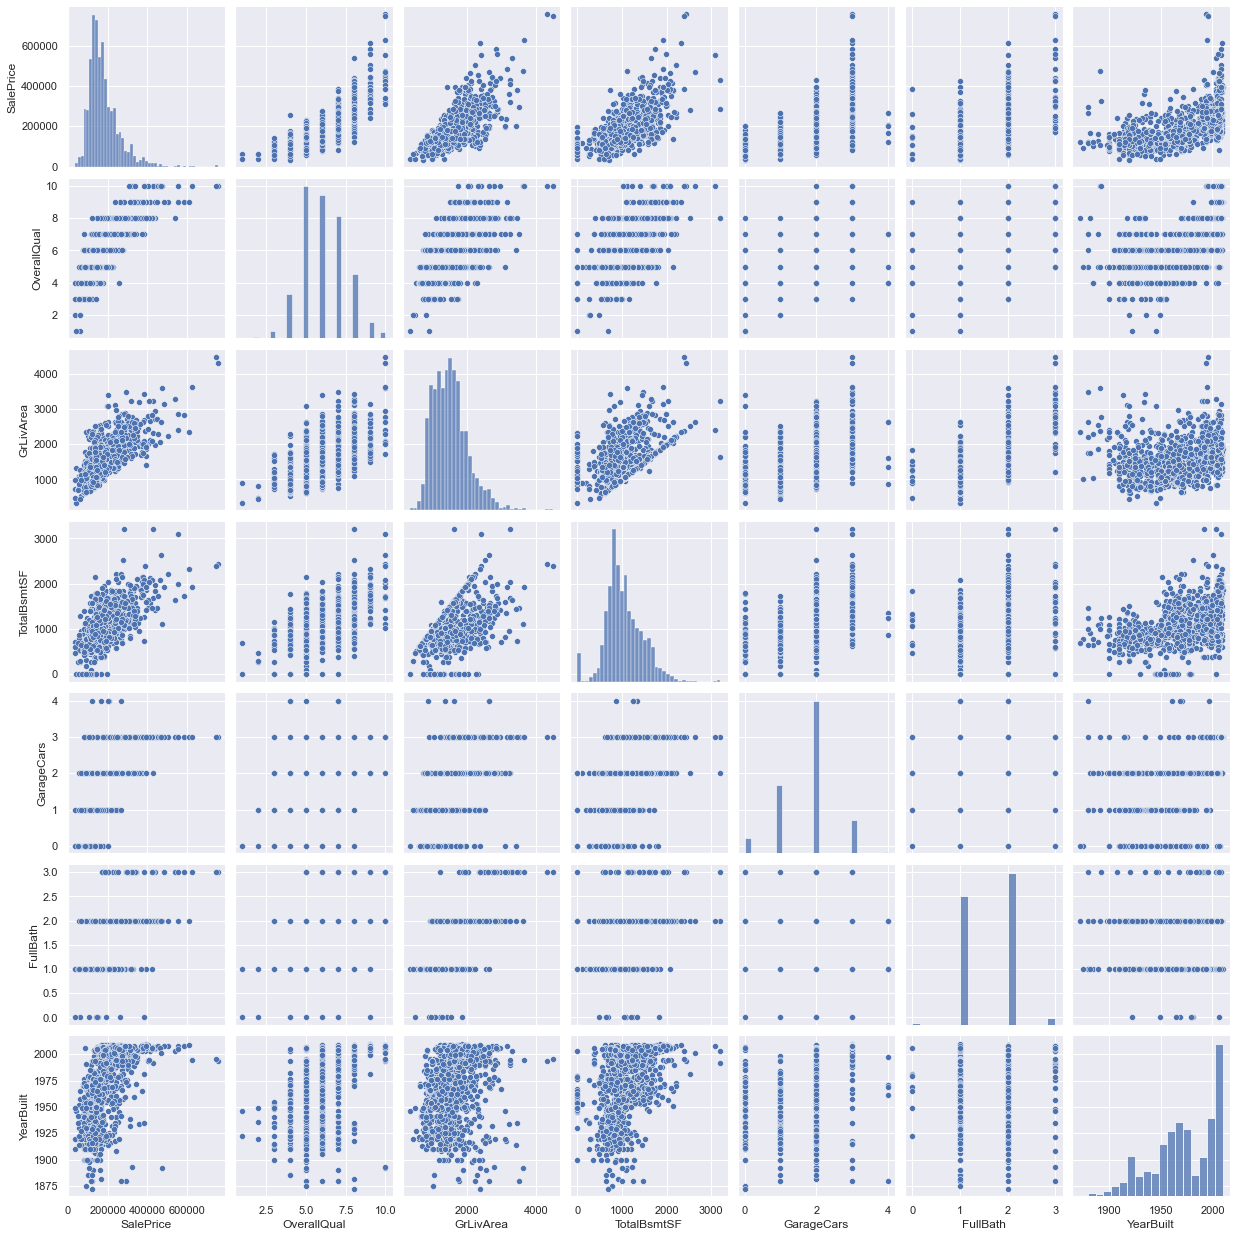

In [42]:
best_index = best_features.index.drop(["1stFlrSF", "GarageArea", "TotRmsAbvGrd"])
sns.pairplot(train[best_index])

**Drop outliers**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


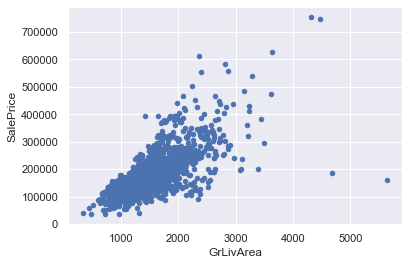

In [16]:
train.plot.scatter(y="SalePrice", x="GrLivArea")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


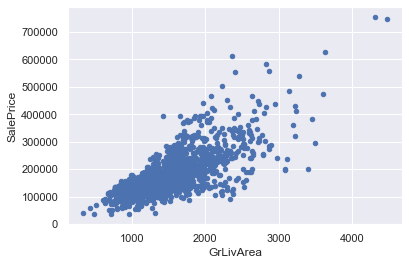

In [17]:
outliers = train[(train["GrLivArea"]>4000) & (train["SalePrice"]<300000)].index
train.drop(outliers, inplace=True)
train.plot.scatter(x="GrLivArea", y="SalePrice")

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


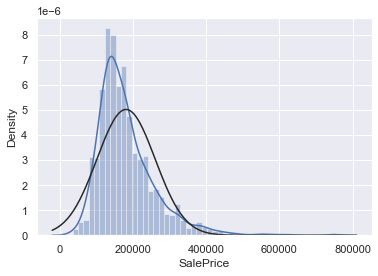

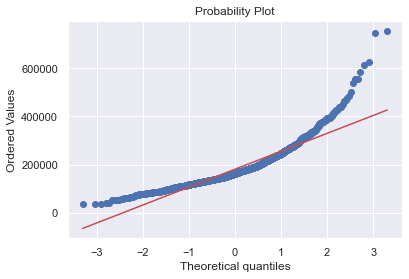

In [48]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# histogram
plt.figure()
sns.distplot(train["SalePrice"], fit=norm)

# Normal probability plot 
plt.figure()
_ = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

**Log transformation of the target varaible** (to be closer to normality)

In [52]:
train["SalePrice"] = np.log(train["SalePrice"])

/Users/axel/ml/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


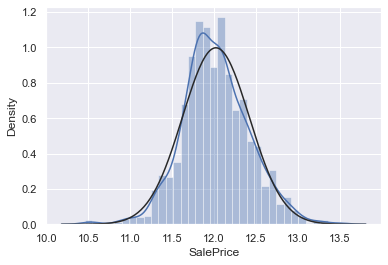

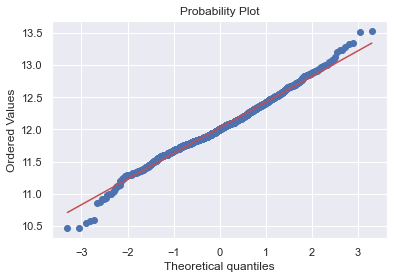

In [53]:
# histogram
plt.figure()
sns.distplot(train["SalePrice"], fit=norm)

# Normal probability plot 
plt.figure()
_ = stats.probplot(train["SalePrice"], plot=plt)
plt.show()

### Features engineering

Concatenate the train and test set

In [245]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

train_index = train.Id
test_index= test.Id

dataset = pd.concat([train,test])
dataset.drop("SalePrice", axis=1, inplace=True)
dataset.set_index("Id", inplace=True)

print(f"TRAINING SIZE {train.shape}")
print(f"TESTING SIZE {test.shape}")
print("---")
print(f"CONCATENATION {dataset.shape}")

TRAINING SIZE (1460, 81)
TESTING SIZE (1459, 80)
---
CONCATENATION (2919, 79)


**Missing values (NaN)**

In [246]:
missing_rate = (dataset.isnull().sum() / dataset.shape[0]) * 100
missing_data = pd.concat([dataset.isnull().sum(), missing_rate], axis=1, keys=["total", "rate"])
missing_data.sort_values(by="total", ascending=False).head(35)

,total,rate
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071
GarageQual,159,5.447071
GarageCond,159,5.447071


In [247]:
dataset.isna().any(0).value_counts()

False    45
True     34
dtype: int64

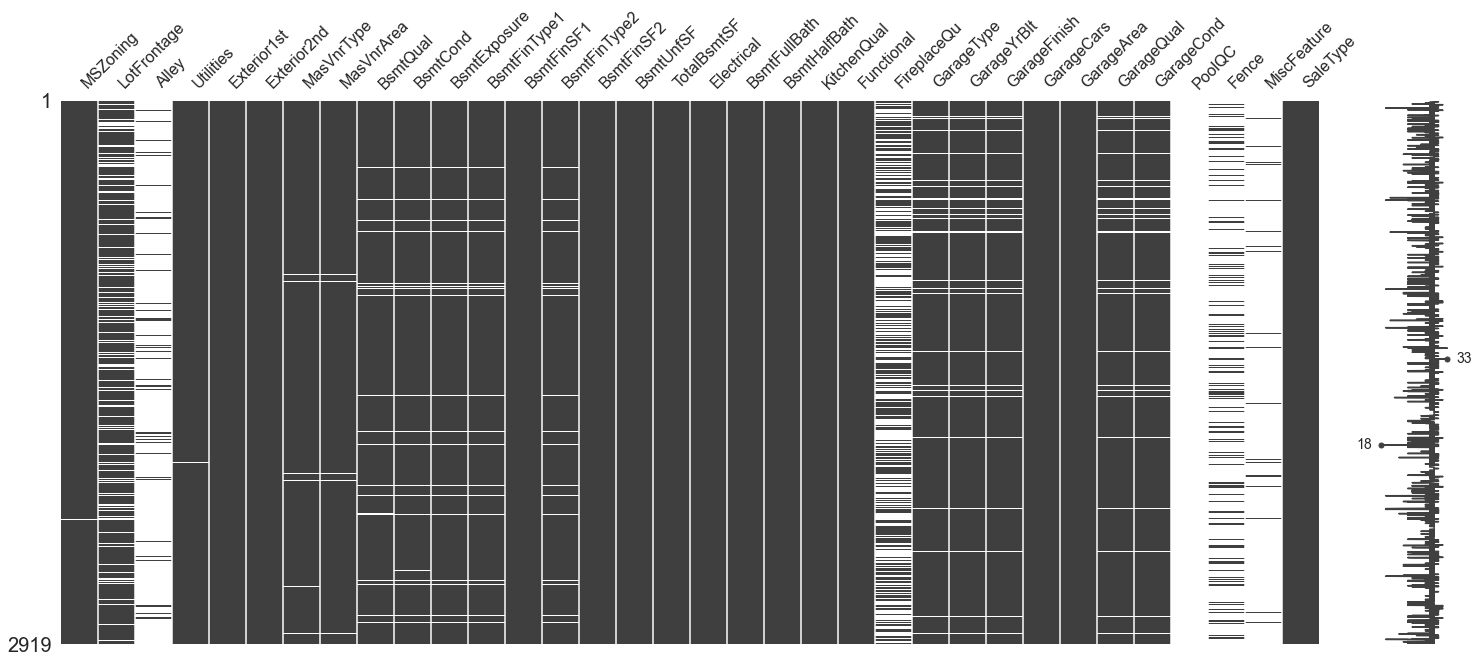

In [248]:
import missingno as msno
col_with_nan = dataset.loc[:,dataset.isna().any(0)]
msno.matrix(col_with_nan)

→ NaN values give info about house's features:
- *Basement*: 97.5%
- *Garage*: 95%
- *Fireplace*: 83%
- *Fence*: 20%
- *Alley*: 7%
- *Pool*: 1%

**Imputing missing values**

replace by None

In [249]:
dataset["PoolQC"].fillna("None", inplace=True)
dataset["MiscFeature"].fillna("None", inplace=True)
dataset["Alley"].fillna("None", inplace=True)
dataset["Fence"].fillna("None", inplace=True)
dataset["FireplaceQu"].fillna("None", inplace=True)
dataset["MasVnrType"].fillna("None", inplace=True)
dataset['MSSubClass'].fillna("None", inplace=True)

for col in ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]:
    dataset[col].fillna("None", inplace=True)

for col in ["BsmtFinType2", "BsmtExposure", "BsmtQual", "BsmtCond", "BsmtFinType1"]:
    dataset[col].fillna("None", inplace=True)

**GarageYrBlt** & **MasVnrArea**: replace by 0

In [250]:
dataset["MasVnrArea"].fillna(0, inplace=True)

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    dataset[col].fillna(0, inplace=True)
    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dataset[col].fillna(0, inplace=True)

**LotFrontage**: Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can fill in missing values by the median LotFrontage of the neighborhood. 

*- idea from this [beautifull notebook](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)*

In [251]:
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

**Electrical**: replace the one missing value with the most frequence value (`SBkr`)

In [252]:
dataset["Electrical"].value_counts(normalize=True)

SBrkr    0.915353
FuseA    0.064428
FuseF    0.017135
FuseP    0.002742
Mix      0.000343
Name: Electrical, dtype: float64

In [254]:
dataset["Electrical"].fillna(dataset["Electrical"].mode()[0], inplace=True)

Replace as well by the mode for **SaleType**, **Exterior1st**, **Exterior2nd**, **KitchenQual**, **MSZoning**, **Functional**

In [262]:
dataset['SaleType'] .fillna(dataset['SaleType'].mode()[0], inplace=True)
dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0], inplace=True)
dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0], inplace=True)
dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0], inplace=True)
dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0], inplace=True)
dataset["Functional"].fillna(dataset["Functional"].mode()[0], inplace=True)

**Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [256]:
dataset["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [257]:
dataset.drop('Utilities', axis=1, inplace=True)

Check if there is reamining missing value

In [263]:
dataset.isna().sum().sum()

0

It remains no missing value.

### More features engineering

In [136]:
dataset.dtypes.value_counts()

object     43
int64      25
float64    12
dtype: int64

**transform numerical variables which are categorical**

In [264]:
dataset["MSSubClass"] = dataset["MSSubClass"].astype("str")

# dataset["MoSold"] = dataset["MoSold"].astype("str")
# dataset["YrSold"] = dataset["YrSold"].astype("str")

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: int64